# Segmentation Workflow Example with 3D Data

This notebook applies a custom segmentation workflow to a 3D nuclei image and measure their properties.

In [1]:
from skimage.io import imread
import napari_segment_blobs_and_things_with_membranes as nsbatwm
from napari_skimage_regionprops._regionprops import regionprops_table
import pandas as pd
import napari
viewer = napari.Viewer()

C:\Miniconda\envs\devbio-napari-env\lib\site-packages\napari_tools_menu\__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


## Open image and add it to napari

In [2]:
image0_n = imread("../../data/3D/nuclei.tif")
viewer.add_image(image0_n, name="nuclei3d")

<Image layer 'nuclei3d' at 0x153f7b1a340>

## Apply voronoi otsu labeling from 'nsbatwm'

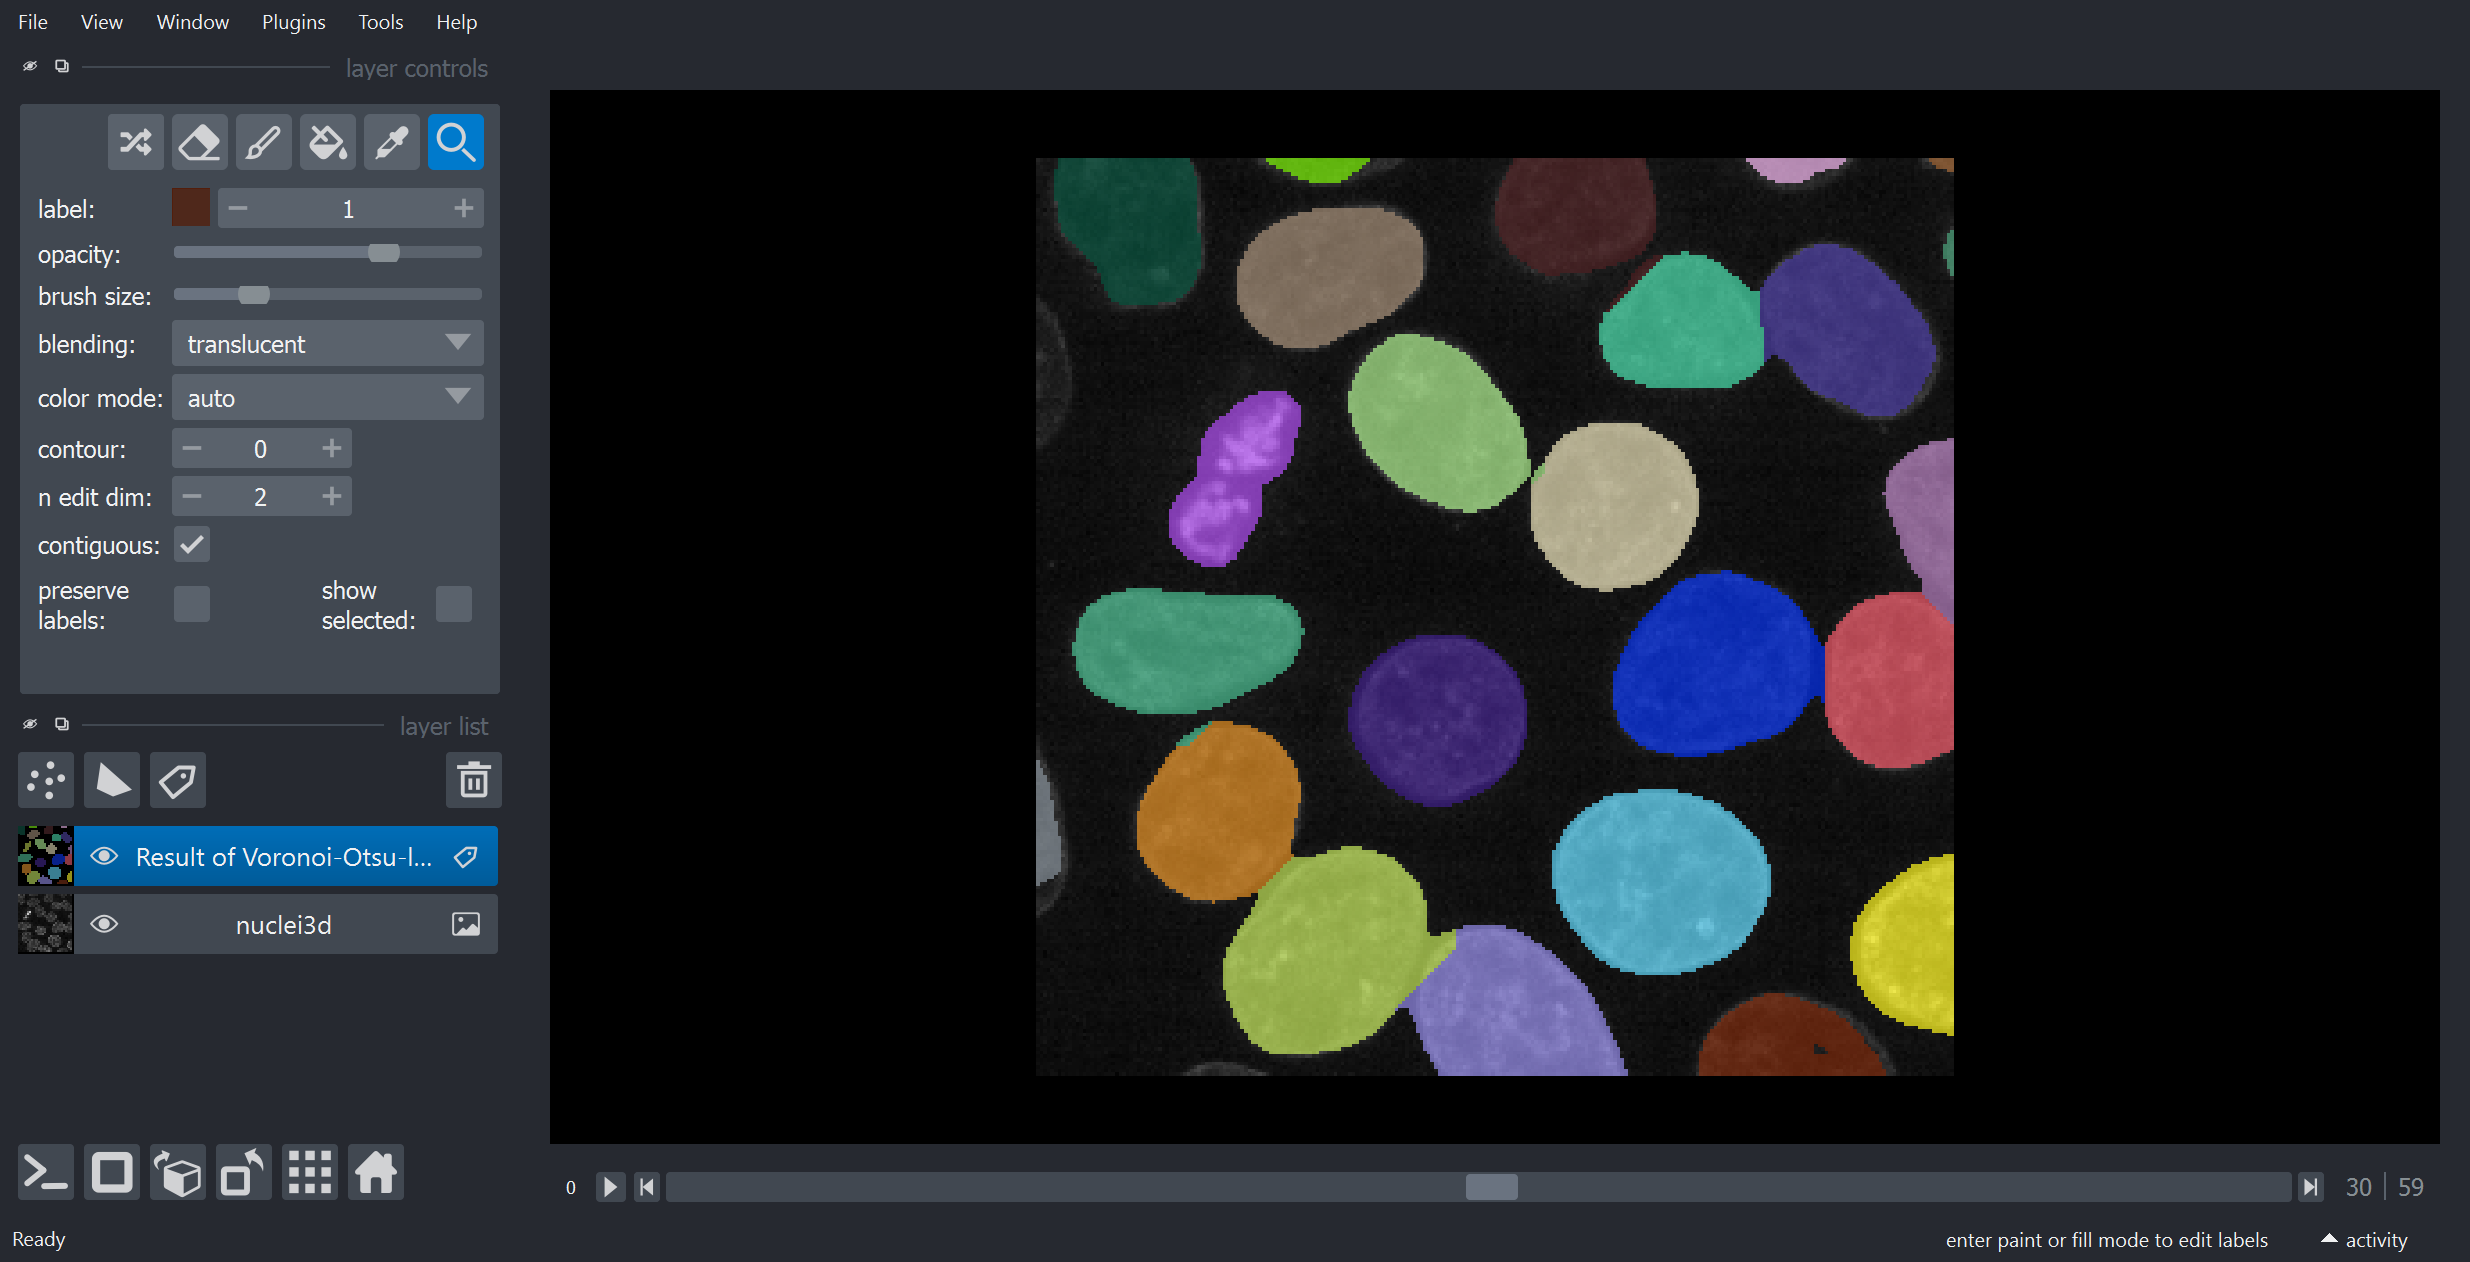

In [3]:
image1_V = nsbatwm.voronoi_otsu_labeling(image0_n, 9.0, 3.0)
viewer.add_labels(image1_V, name='Result of Voronoi-Otsu-labeling (nsbatwm)')
napari.utils.nbscreenshot(viewer)

## Apply remove labels on edges from 'nsbatwm'

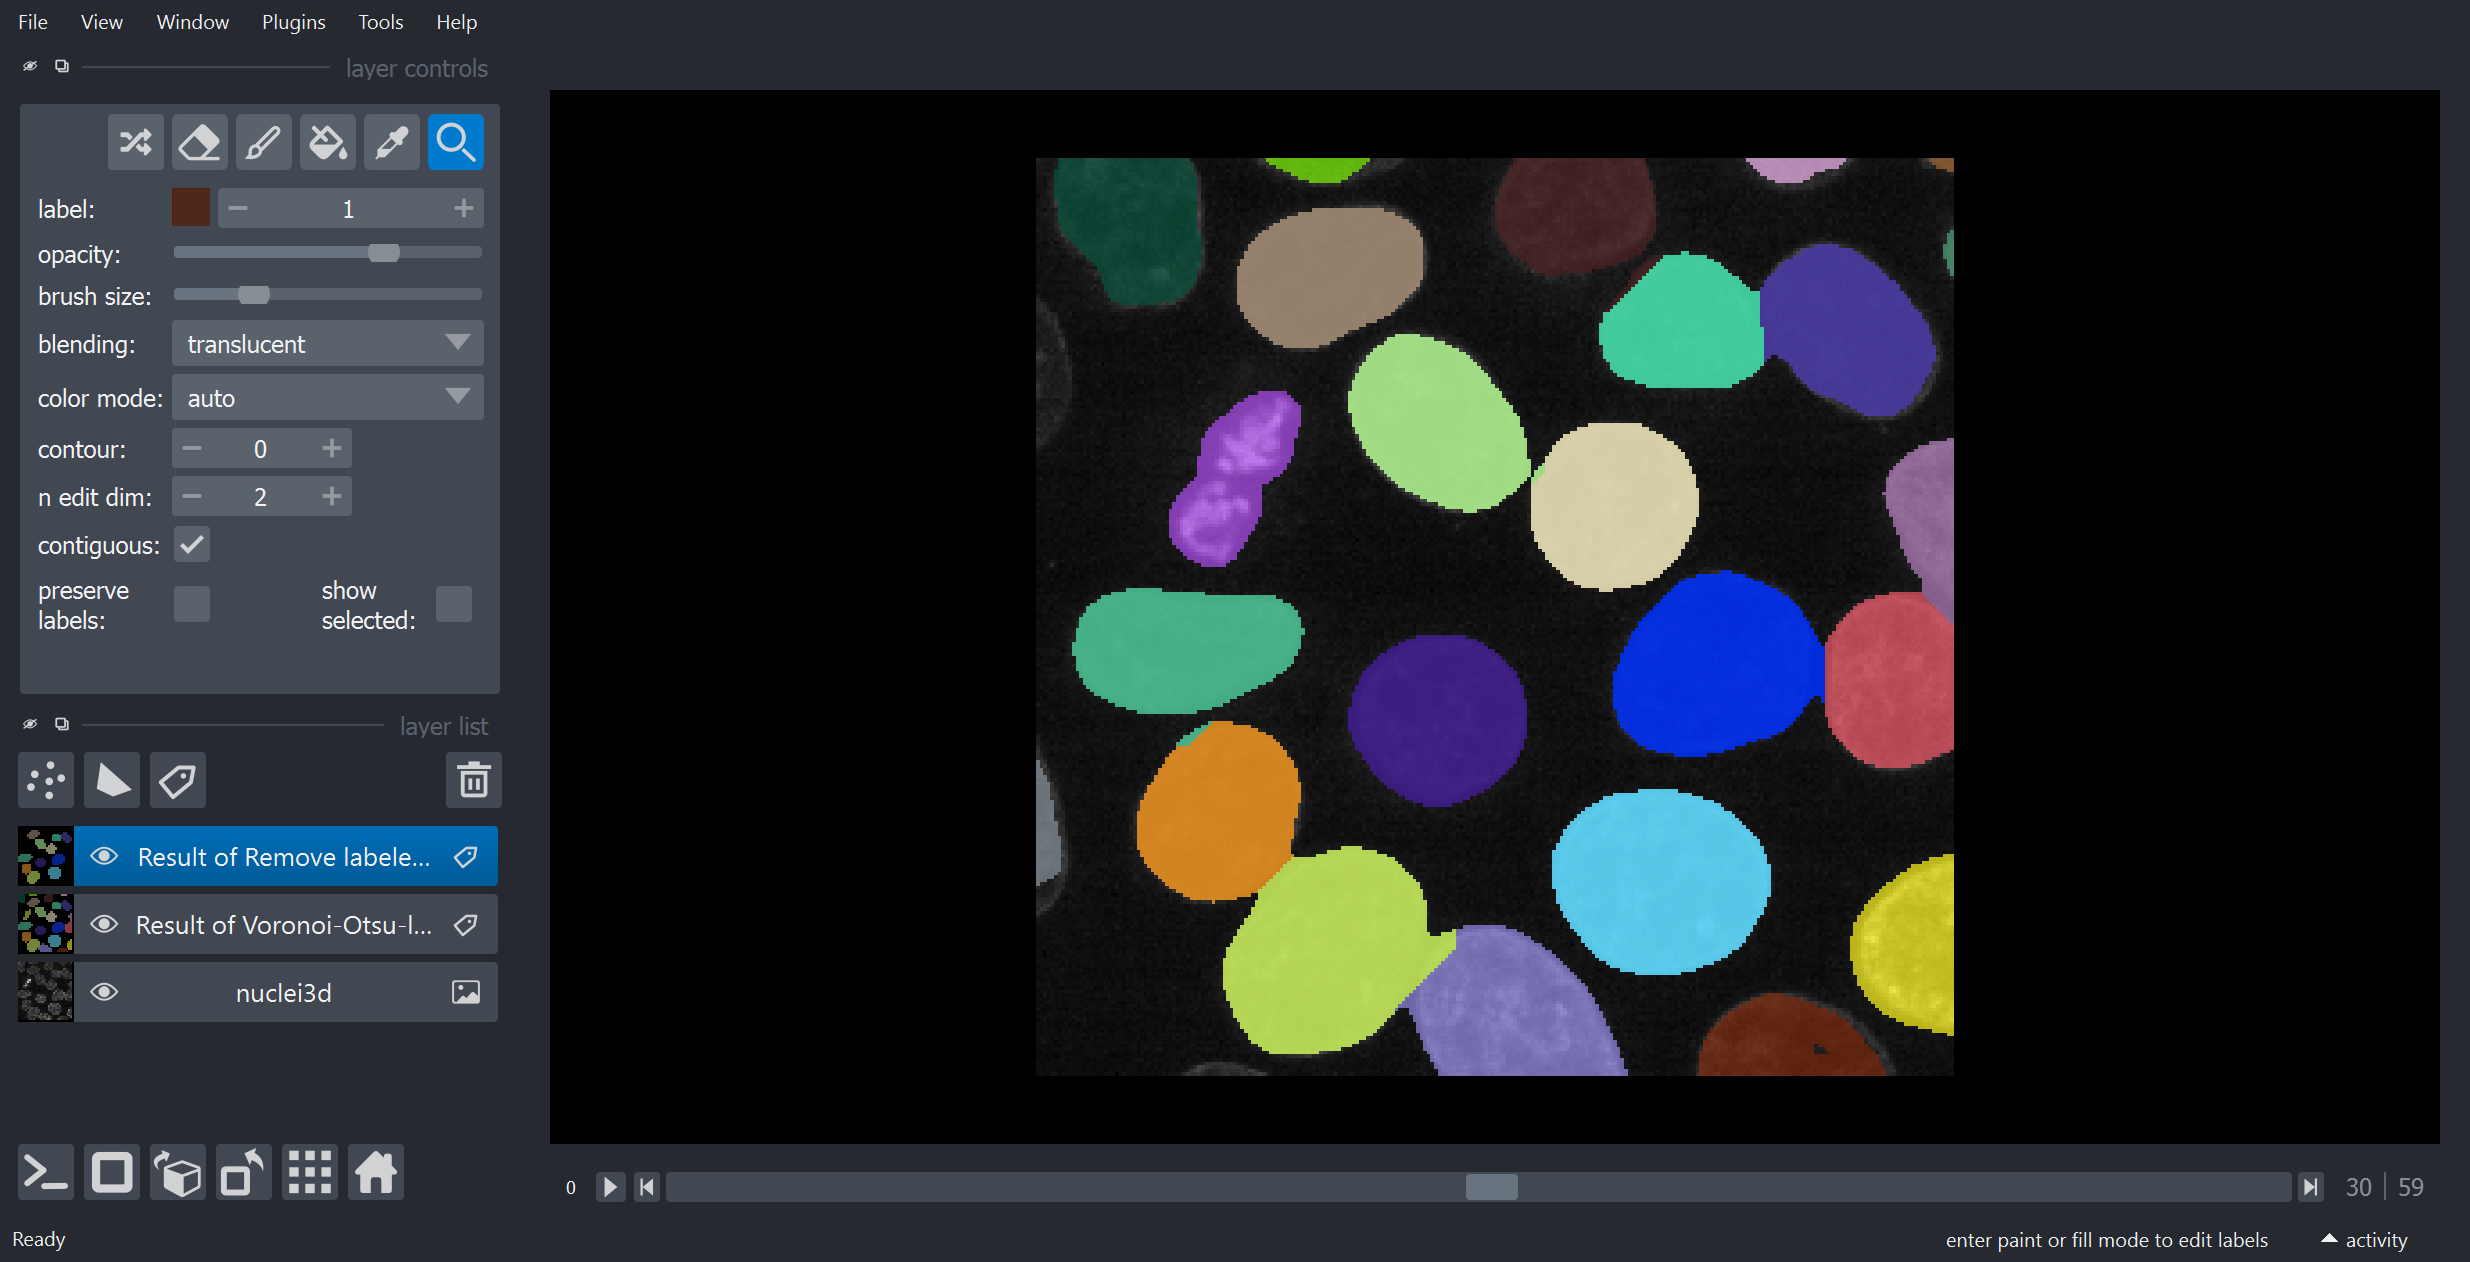

In [4]:
image2_R = nsbatwm.remove_labels_on_edges(image1_V)
viewer.add_labels(
    image2_R, name='Result of Remove labeled objects at the image border (scikit-image, nsbatwm)')
napari.utils.nbscreenshot(viewer)

## Measure properties from 'scikit-image'

To measure some object properties, here we use regionprops_table function from [napari_skimage_regionprops](https://github.com/haesleinhuepf/napari-skimage-regionprops), a convenient package based on [scikit-image.regionprops](https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops_table) that integrates to napari. Another well-suited option for 3D data would be to use SimpleITK by means of the function [label_statistics](https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/22_feature_extraction/statistics_with_simpleitk.html#label-statistics).

The output properties can be displayed in a table format by using the [pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) class.

In [5]:
df = pd.DataFrame(regionprops_table(image0_n, image2_R, shape = True))
df

label   area  bbox_area  convex_area  equivalent_diameter  max_intensity  \
0       2  54018      95160        56545            46.900769        55624.0   
1       5  33789      71400        37316            40.110577        27219.0   
2       6  37770      84150        40336            41.627736        34332.0   
3      10  62690     138355        70018            49.287094        46093.0   
4      12  35227      67840        37057            40.671702        34617.0   
5      13  50281      96720        53668            45.793281        32910.0   
6      14  47652      91035        49683            44.980834        47610.0   
7      15  39960      74307        42190            42.417228        42394.0   
8      18  41456      78336        43518            42.940087        39406.0   
9      20  37480      77175        39760            41.520922        36134.0   
10     21  53894     119662        61516            46.864854        41113.0   

    mean_intensity  min_intensity  solidity    extent  feret_diameter_max  \
0     14464.512237         2656.0  0.955310  0.567654           62.713635   
1     11941.699014         3841.0  0.905483  0.473235           57.323643   
2     12231.912126         4410.0  0.936384  0.448841           60.942596   
3     13604.486840         3177.0  0.895341  0.453110           69.555733   
4     12520.697703         5216.0  0.950617  0.519266           56.621551   
5     13568.257433         2845.0  0.936890  0.519861           63.039670   
6     15270.557668         3367.0  0.959121  0.523447           55.263008   
7     12881.410035         3746.0  0.947144  0.537769           53.600373   
8     13613.137712         3746.0  0.952617  0.529208           50.813384   
9     13623.915715         2656.0  0.942656  0.485649           52.411831   
10    14404.345734         3462.0  0.876097  0.450385           68.658576   

    local_centroid-0  local_centroid-1  local_centroid-2  \
0          13.364397         25.457755         29.293958   
1          12.970641         24.381988         25.413922   
2          14.037225         25.143685         24.855361   
3          17.141298         29.485404         30.823369   
4          14.429500         18.455418         25.085531   
5          14.202084         26.887970         29.218631   
6          16.303828         24.445417         24.678712   
7          14.970821         25.792593         23.624575   
8          15.346850         23.811318         23.456532   
9          17.442716         22.771798         24.673986   
10         18.467566         18.107377         32.375292   

    standard_deviation_intensity  minor_axis_length  intermediate_axis_length  \
0                    4805.435420          31.327969                 52.933836   
1                    2634.150462          27.770888                 40.471195   
2                    2812.426772          30.788439                 40.258475   
3                    4320.199048          33.433710                 53.831092   
4                    2672.433396          31.836384                 37.536132   
5                    3758.117584          30.653051                 50.748681   
6                    5085.798832          33.553811                 50.917972   
7                    3322.773305          31.962681                 45.374937   
8                    3504.742536          33.757661                 47.638142   
9                    3463.962853          31.691874                 45.865526   
10                   4509.947285          33.761613                 44.762926   

    major_axis_length  
0           62.953106  
1           58.424627  
2           59.120315  
3           67.988548  
4           57.477872  
5           62.747225  
6           53.555392  
7           53.145880  
8           49.489597  
9           49.960174  
10          71.035177

## Plot data

Pandas has some built-in plotting capabilities, check more options [here](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization).

For a quick demonstration, here we show how to display a scatter plot of two table columns. More customized and stylish plots can be better achieved with dedicated plotting libraries like [matplotlib](https://matplotlib.org/stable/gallery/index.html), [seaborn](https://seaborn.pydata.org/examples/index.html), among others.

<AxesSubplot:xlabel='area', ylabel='mean_intensity'>

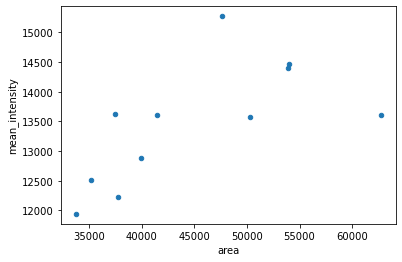

In [6]:
df.plot.scatter('area', 'mean_intensity')

## Save table to disk

Pandas has easy functions to save table to disk. Below, we show how to save a table as a csv file.

In [7]:
df.to_csv('../../data/3D/table_nuclei.csv')

## Exercise

Now that you have a complete working workflow, put it inside a function. 

Below you find an empty function that should receive an image and return a labeled image. Fill it with the commands used above to have the same output.

In [8]:
def my_segmentation(image):
    """Apply custom 3D nuclei segmentation and return labeled image"""
    
       
    return label_image

Then, run your new function as shown below, passing the input image as argument and adding the output labeled image to napari to check if the result is the same.

In [ ]:
image2_R = my_segmentation(image0_n)
viewer.add_labels(image2_R)

Finally save the labeled image to disk with the name 'nuclei_labels'. Check the function below to find out how to do it.

In [9]:
from skimage.io import imsave

imsave?

Signature: imsave(fname, arr, plugin=None, check_contrast=True, **plugin_args)
Docstring:
Save an image to file.

Parameters
----------
fname : str or pathlib.Path
    Target filename.
arr : ndarray of shape (M,N) or (M,N,3) or (M,N,4)
    Image data.
plugin : str, optional
    Name of plugin to use.  By default, the different plugins are
    tried (starting with imageio) until a suitable
    candidate is found.  If not given and fname is a tiff file, the
    tifffile plugin will be used.
check_contrast : bool, optional
    Check for low contrast and print warning (default: True).

Other Parameters
----------------
plugin_args : keywords
    Passed to the given plugin.

Notes
-----
When saving a JPEG, the compression ratio may be controlled using the
``quality`` keyword argument which is an integer with values in [1, 100]
where 1 is worst quality and smallest file size, and 100 is best quality
and largest file size (default 75).  This is only available when using
the PIL and imageio pl